# Sentiment Analysis of the IMDB Movie Reviews Dataset Using NLP Techniques

## Installing Required Libraries

In [ ]:
!pip install TextBlob

In [ ]:
!pip install tqdm

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

## Importing Libraries

In [70]:
# Standard Libraries
import re
import string
import warnings
from collections import Counter

# Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Utility Libraries
import joblib

# Suppress warnings
warnings.filterwarnings('ignore')


In [71]:
#df = pd.read_csv('IMDB Dataset.csv')
#df.head()

In [72]:
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
df = pd.read_csv(path + '/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [73]:
df.shape

(50000, 2)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [75]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

## Data Preparation

### Encoding the Target Variable

In [76]:
# Map sentiment labels to binary values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [77]:
df['sentiment']

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


### Lowercasing

In [78]:
df['review'] = df['review'].str.lower()

In [79]:
df['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

### Remove HTML Tags

In [80]:
def remove_html_tag(text):
    return re.sub(r'<.*?>', '', text)

df['review'] = df['review'].apply(remove_html_tag)

In [81]:
df['review'][5]

'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times in the last 25 years. paul lukas\' performance brings tears to my eyes, and bette davis, in one of her very few truly sympathetic roles, is a delight. the kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. and the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. if i had a dozen thumbs, they\'d all be "up" for this movie.'

### Remove URLs

In [82]:
def remove_url(text):

    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)

df['review'] = df['review'].apply(remove_url)

In [83]:
df['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

### Remove Punctuation

In [84]:
exclude = string.punctuation
# string.punctuation is a predefined string that contains all
# common punctuation characters.
# It’s simply a string of characters, not an object or class.

exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
def remove_punctuation(text):

    for i in exclude:
        text = text.replace(i,'')

    text = ' '.join(text.split()) # for removing extra spaces b/w words
    return text

In [86]:
remove_punctuation(df['review'][3])

'basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents descent dialogs as for the shots with jake just ignore them'

In [87]:
df['review'] = df['review'].apply(remove_punctuation)

### Chat Word Treatment

In [88]:
slang_dict = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A** Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A**",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A** Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}

In [89]:
keys = list(slang_dict.keys())

def remove_chat_words(text):

    for i in keys:
        if i.lower() in text.split():
               text = text.replace(i.lower(), slang_dict[i])
    return text

df['review'] = df['review'].apply(remove_chat_words)

### Removing Spelling Correction

In [90]:

# This line imports the TextBlob class from the textblob library,

s1 = "I went to the librery yesturday to borow somes boks. The libary was quiet and peacefuls, a perfect place for reeding and relaxong."

str(TextBlob(s1).correct())
# The .correct() method attempts to correct any spelling errors in the text.

NameError: name 'TextBlob' is not defined

### Removing Stop words

In [91]:
nltk.download('stopwords')
# 1. This line imports the NLTK library
# 2. NLTK provides various functionalities for natural language processing (NLP)
#tasks, including stopwords removing ,tokenization, stemming

from nltk.corpus import stopwords
# This line imports the stopwords module from the nltk.corpus package.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_w = stopwords.words('english')
# .words() is a method associated with the stopwords corpus
# in the NLTK library.

stop_w[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [92]:
# prompt: Removing Stop words
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

df['review'] = df['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['review'][2]

'thought wonderful way spend Tears eyes hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown lovethis id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friends'

### Removing Extra Spaces

In [ ]:
def remove_extra_spaces(text):
    return ' '.join(text.strip().split())

df['review'] = df['review'].apply(remove_extra_spaces)

In [ ]:
df['review'][2]

'thought wonderful way spend Tears eyes hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown lovethis id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friends'

## Text Preprocessing

In [93]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing functions
def remove_extra_spaces(text):
    """Remove extra spaces from the text."""
    return ' '.join(text.strip().split())

def preprocess_text(text):
    """Perform complete preprocessing on the text."""
    # Step 1: Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Step 2: Convert text to lowercase
    text = text.lower()
    # Step 3: Remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Step 4: Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Step 5: Reconstruct the text
    return " ".join(tokens)

# Example usage on your dataset
df['review'] = df['review'].apply(remove_extra_spaces)
df['processed_review'] = df['review'].apply(preprocess_text)
# Check the result
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              review  sentiment  \
0  one reviewers mentioned watching 1 oz episode ...          1   
1  wonderful little production filming technique ...          1   
2  thought wonderful way spend Tears eyes hot sum...          1   
3  basically theres family little boy jake thinks...          0   
4  petter matteis love Tears eyes money visually ...          1   

                                    processed_review  
0  one reviewer mentioned watching 1 oz episode y...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend tear eye hot summe...  
3  basically there family little boy jake think t...  
4  petter matteis love tear eye money visually st...  


##Exploratory Data Analysis (EDA)

### Word Frequency Analysis

In [94]:
# Combine all reviews into a single string
all_reviews = " ".join(df['processed_review'])

# Split the string into words
all_words = all_reviews.split()

# Count word frequencies
word_freq = Counter(all_words)

# Display the top 10 most common words
print("Top 10 most frequent words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")


Top 10 most frequent words:
movie: 98936
film: 89745
one: 52645
like: 39780
good: 28603
eye: 27777
tear: 27722
character: 27565
get: 24557
even: 24281


### Word Cloud Visualization

In [95]:
!pip install WordCloud

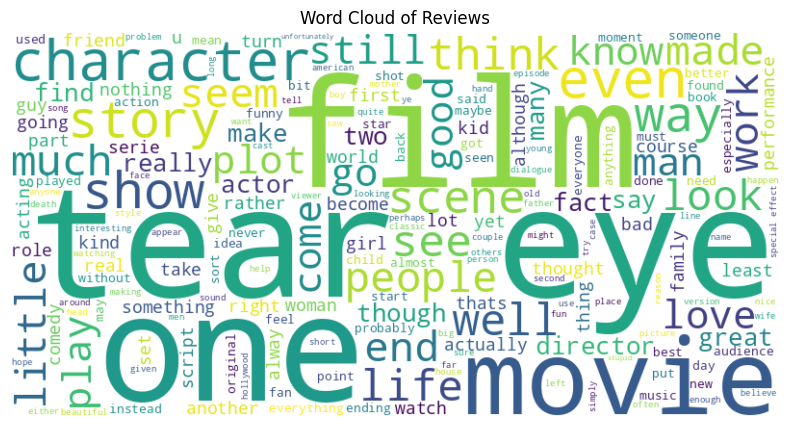

In [96]:


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()


### Sentiment Distribution Analysis

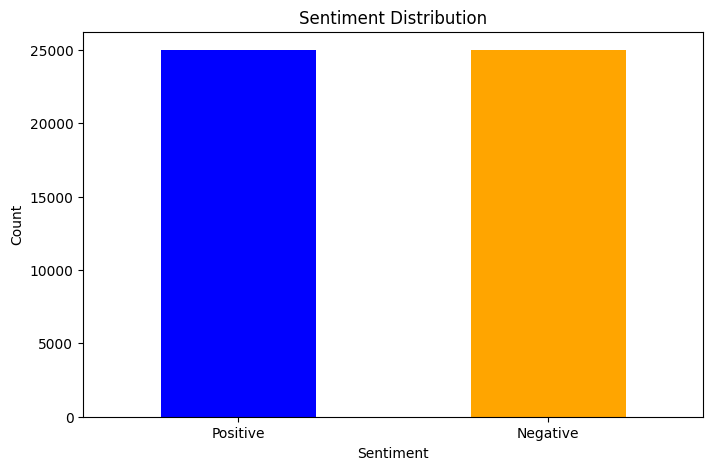

In [97]:
# Map sentiment values to labels
df['sentiment_label'] = df['sentiment'].map({0: 'Negative', 1: 'Positive'})

# Visualize sentiment distribution with updated labels
df['sentiment_label'].value_counts().plot(kind='bar', color=['blue', 'orange'], figsize=(8, 5))
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep labels horizontal for clarity
plt.show()


## Model Training

In [98]:
sample_comparison = pd.DataFrame({
    'Original Review': df['review'].head(),
    'Processed Review': df['processed_review'].head()
})
sample_comparison

,Original Review,Processed Review
0,one reviewers mentioned watching 1 oz episode ...,one reviewer mentioned watching 1 oz episode y...
1,wonderful little production filming technique ...,wonderful little production filming technique ...
2,thought wonderful way spend Tears eyes hot sum...,thought wonderful way spend tear eye hot summe...
3,basically theres family little boy jake thinks...,basically there family little boy jake think t...
4,petter matteis love Tears eyes money visually ...,petter matteis love tear eye money visually st...


## Feature Extraction

In [99]:
# Convert text to TF-IDF features
print("Extracting features...")
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_review'])
y = df['sentiment']

Extracting features...


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [100]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (40000, 5000)
Testing set shape: (10000, 5000)


## Model Training


### Train Logistic Regression model

In [101]:

print("Training model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

Training model...


LogisticRegression(max_iter=1000)

### # Make predictions

In [102]:

y_pred = model.predict(X_test)

## Model Evaluation

### Print classification report

In [103]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Create confusion matrix visualization

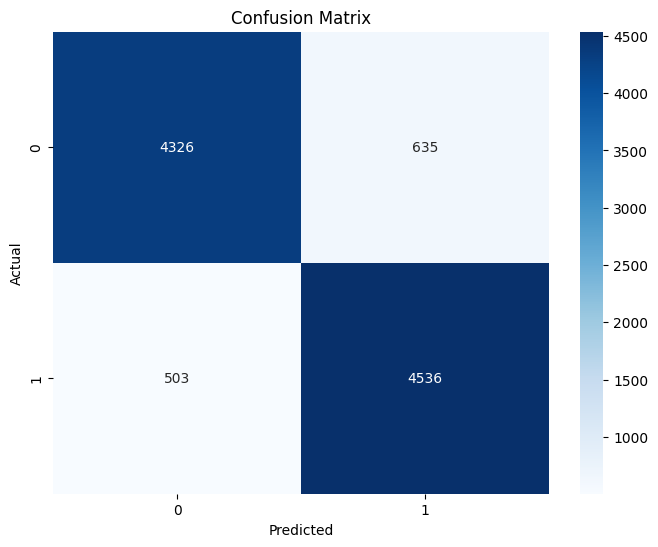

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='d',
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance Analysis

### Analyze feature importance

In [105]:
feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Top 20 Most Important Words:")
feature_importance.head(20)

Top 20 Most Important Words:


,feature,importance
4952,worst,10.183224
4829,waste,7.966689
391,bad,7.288218
382,awful,7.239284
1971,great,6.835176
1569,excellent,6.527223
550,boring,6.461036
3334,poor,5.846013
4447,terrible,5.763211
3055,nothing,5.499612


## Error Analysis

### Get indices where predictions are incorrect

In [106]:
incorrect_indices = (y_test != y_pred)

### Get the incorrect predictions

In [107]:
incorrect_texts = tfidf.inverse_transform(X_test[incorrect_indices])
incorrect_actual = y_test[incorrect_indices]
incorrect_predicted = y_pred[incorrect_indices]

### Create DataFrame with error analysis

In [108]:

incorrect_predictions = pd.DataFrame({
    'text': [' '.join(text) for text in incorrect_texts],  # Join the tokens back into text
    'actual': incorrect_actual,
    'predicted': incorrect_predicted
})

In [109]:
print(f"Total incorrect predictions: {len(incorrect_predictions)}")
print("\nSample of Incorrect Predictions:")
print(incorrect_predictions.head())

Total incorrect predictions: 1138

Sample of Incorrect Predictions:
                                                    text  actual  predicted
33553  one first main due ever guard michael really e...       1          0
49498  one mentioned episode first thing scene go fac...       1          0
29282  thing set use main get well give done thought ...       1          0
6113   would main mainstream got well little producti...       1          0
15118  scene sex way tear eye career movie similar mo...       1          0


### Calculate error statistics using numpy

In [110]:
error_stats = pd.DataFrame({
    'false_positive': [np.sum((y_pred == 1) & (y_test == 0))],
    'false_negative': [np.sum((y_pred == 0) & (y_test == 1))]
})


In [111]:
print("\nError Statistics:")
print(error_stats)


Error Statistics:
   false_positive  false_negative
0             635             503


### Visualization of error distribution

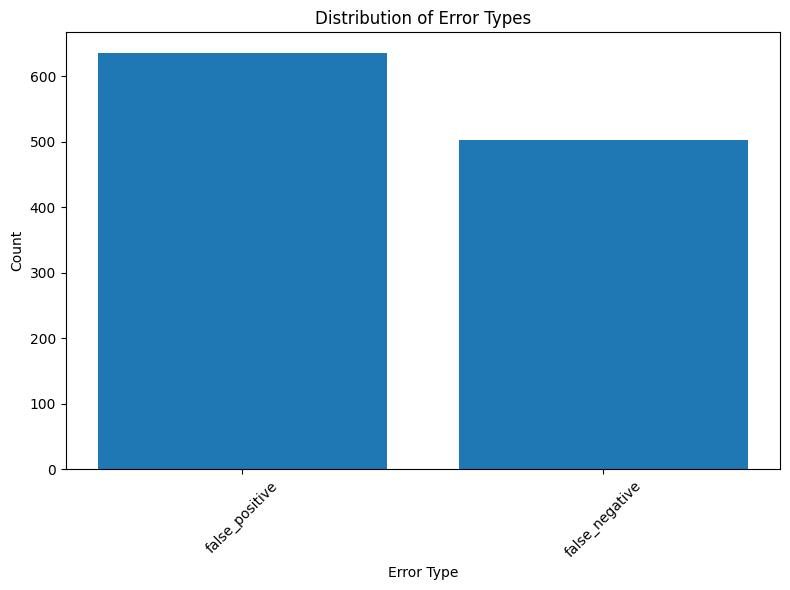

In [112]:
plt.figure(figsize=(8, 6))
plt.bar(error_stats.columns, error_stats.iloc[0])
plt.title('Distribution of Error Types')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Additional error analysis

In [113]:
print("\nError Rate Analysis:")
total_samples = len(y_test)
total_errors = len(incorrect_predictions)
print(f"Total samples: {total_samples}")
print(f"Total errors: {total_errors}")
print(f"Error rate: {(total_errors/total_samples)*100:.2f}%")
print(f"False Positive Rate: {(error_stats['false_positive'][0]/total_samples)*100:.2f}%")
print(f"False Negative Rate: {(error_stats['false_negative'][0]/total_samples)*100:.2f}%")



Error Rate Analysis:
Total samples: 10000
Total errors: 1138
Error rate: 11.38%
False Positive Rate: 6.35%
False Negative Rate: 5.03%


## Cross-Validation

### Cross-validation on base model

In [114]:
print("Performing 5-fold cross-validation on base Logistic Regression...")
cv_scores = cross_val_score(LogisticRegression(max_iter=1000),
                          X, y, cv=5, scoring='accuracy')
print(f"CV Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")


Performing 5-fold cross-validation on base Logistic Regression...
CV Scores: [0.8885 0.8886 0.8846 0.8857 0.885 ]
Average CV Score: 0.8865 (+/- 0.0035)


### Try different models

In [116]:
def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    """Evaluate a model and print its performance metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    return model

### Initialize models

In [117]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(max_iter=2000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}


### Train and evaluate each model

In [118]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    results[name] = evaluate_model(model, name, X_train, X_test, y_train, y_test)



Training Logistic Regression...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Training Naive Bayes...

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Training Linear SVM...

Linear SVM Results:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy               

## Hyperparameter tuning for the best model

In [119]:
# Let's tune Logistic Regression as an example
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

print("\nPerforming Grid Search for Logistic Regression...")
grid_search = GridSearchCV(LogisticRegression(max_iter=1000),
                         param_grid,
                         cv=5,
                         scoring='accuracy',
                         n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Performing Grid Search for Logistic Regression...

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.885075


In [120]:
# Final evaluation with best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nFinal Model Performance:")
print(classification_report(y_test, y_pred_best))


Final Model Performance:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Learning curves visualization

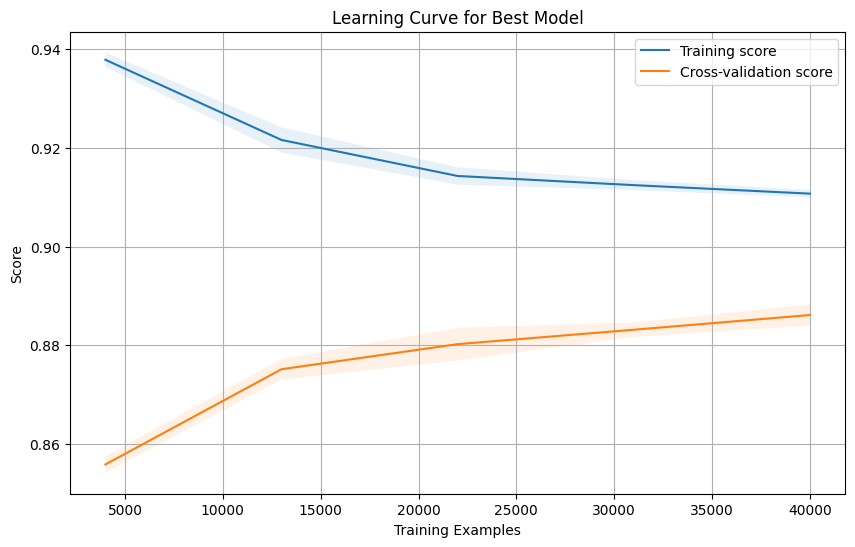

In [121]:
def plot_learning_curve(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(best_model, 'Learning Curve for Best Model')

### Save the best model

In [122]:
joblib.dump(best_model, 'best_sentiment_model.joblib')
joblib.dump(tfidf, 'final_tfidf_vectorizer.joblib')
print("\nBest model and vectorizer saved successfully!")


Best model and vectorizer saved successfully!


In [123]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [124]:
class SentimentPredictor:
    def __init__(self, model_path='best_sentiment_model.joblib',
                 vectorizer_path='final_tfidf_vectorizer.joblib'):
        """Initialize the sentiment predictor with trained model and vectorizer."""
        # Load the trained model and vectorizer
        self.model = joblib.load(model_path)
        self.vectorizer = joblib.load(vectorizer_path)

        # Initialize preprocessing tools
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def preprocess_text(self, text):
        """Preprocess a single text input."""
        # Remove punctuation
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

        # Convert to lowercase
        text = text.lower()

        # Remove stop words
        tokens = text.split()
        tokens = [word for word in tokens if word not in self.stop_words]

        # Lemmatize tokens
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]

        # Join tokens back into text
        return " ".join(tokens)

    def predict_sentiment(self, text, return_probability=False):
        """
        Predict sentiment for a single text input.
        Returns 'Positive' or 'Negative' and optionally probability.
        """
        # Preprocess the text
        processed_text = self.preprocess_text(text)

        # Vectorize the text
        text_vectorized = self.vectorizer.transform([processed_text])

        # Get prediction and probability
        prediction = self.model.predict(text_vectorized)[0]

        if return_probability:
            probability = self.model.predict_proba(text_vectorized)[0]
            confidence = probability.max()
            return ('Positive' if prediction == 1 else 'Negative', confidence)

        return 'Positive' if prediction == 1 else 'Negative'

    def batch_predict(self, texts, return_probability=False):
        """
        Predict sentiment for a list of texts.
        Returns DataFrame with predictions and optionally probabilities.
        """
        # Preprocess all texts
        processed_texts = [self.preprocess_text(text) for text in texts]

        # Vectorize all texts
        texts_vectorized = self.vectorizer.transform(processed_texts)

        # Get predictions
        predictions = self.model.predict(texts_vectorized)

        # Create results dictionary
        results = {
            'text': texts,
            'sentiment': ['Positive' if pred == 1 else 'Negative' for pred in predictions]
        }

        # Add probabilities if requested
        if return_probability:
            probabilities = self.model.predict_proba(texts_vectorized)
            results['confidence'] = [prob.max() for prob in probabilities]

        return pd.DataFrame(results)


In [125]:
predictor = SentimentPredictor()

# Example single prediction
sample_text = "This movie was amazing! The plot and acting were fantastic."
result = predictor.predict_sentiment(sample_text, return_probability=True)
print(f"\nSample text: {sample_text}")
print(f"Prediction: {result[0]}")
print(f"Confidence: {result[1]:.2f}")

# Example batch prediction
sample_texts = [
    "This movie was terrible. I hated every minute of it.",
    "Great performances and an engaging story!",
    "Average movie, nothing special but not bad either."
]

results_df = predictor.batch_predict(sample_texts, return_probability=True)
print("\nBatch Predictions:")
print(results_df)


Sample text: This movie was amazing! The plot and acting were fantastic.
Prediction: Positive
Confidence: 0.97

Batch Predictions:
                                                text sentiment  confidence
0  This movie was terrible. I hated every minute ...  Negative    0.996836
1          Great performances and an engaging story!  Positive    0.974571
2  Average movie, nothing special but not bad eit...  Negative    0.995188


<center>
  <h2>Merci pour la lecture !</h2>
</center>